# Block Resampling 

This code (instead of calculating hargreaves etc like Block Resampling (Finished)), simply tries to resample a NetCDF file using quantiles. 

If you want to download this notebook you can use GitHub and [nbviewer](http://nbviewer.jupyter.org/)

### User-Defined Variables 

Change these numbers for the degree of extreme you want - but be careful, if you go to high you won't have enough data for each season, so some trial and error may be necessary

In [2]:
upperlimit = 0.8 #this method uses quantiles, if this number is 0.9 the top 10% of data will be considered 'extreme' and so on
lowerlimit = 0.2

### Load Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import pyeto #install from here (https://github.com/woodcrafty/PyETo), download zip, move to scripts folder in your python
# distribution (/Anaconda/Scripts/PyETo), navigate to this folder in your cmd, type: python setup.py install, restart python
#from pyeto import hargreaves
%matplotlib inline
import matplotlib

#additional NetCDF things: 
import xarray
np.set_printoptions(precision=3, linewidth=100, edgeitems=2)  # make numpy less verbose

### Read in & display climate data

Read in netCDF for Ireland

In [4]:
ds = xarray.open_dataset('E:/Data/EObs/IrelandEObsMonthly.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 816)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-31 1950-02-28 1950-03-31 ...
  * longitude  (longitude) float32 -10.875 -10.625 -10.375 -10.125 -9.875 ...
  * latitude   (latitude) float32 51.125 51.375 51.625 51.875 52.125 52.375 ...
Data variables:
    tg         (time, latitude, longitude) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.2 (http://c...
    Conventions:               CF-1.4
    history:                   Tue Jul 10 14:55:07 2018: cdo monmean tg_0.25d...
    Ensembles_ECAD:            17.0
    References:                http://www.ecad.eu\nhttp://www.ecad.eu/downloa...
    NCO:                       4.6.7
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.6.2 (http://c...

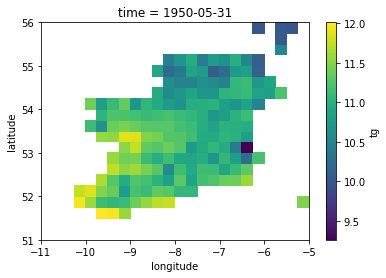

In [5]:
#test to see if it is what it's supposed to be
temp = (ds.tg).isel(time=4)
temp.plot()

In [6]:
#convert to dataframe
df = ds.to_dataframe()
df.head()

#df.to_csv('E:/Temp/dfexplore.csv') #write to csv to explore (optional)

tg
latitude longitude time          
51.125   -10.875   1950-01-31 NaN
                   1950-02-28 NaN
                   1950-03-31 NaN
                   1950-04-30 NaN
                   1950-05-31 NaN

In [7]:
df = df.reset_index()
df.head(n=440)

,latitude,longitude,time,tg
0,51.125,-10.875,1950-01-31,NaN
1,51.125,-10.875,1950-02-28,NaN
2,51.125,-10.875,1950-03-31,NaN
3,51.125,-10.875,1950-04-30,NaN
4,51.125,-10.875,1950-05-31,NaN
5,51.125,-10.875,1950-06-30,NaN
6,51.125,-10.875,1950-07-31,NaN
7,51.125,-10.875,1950-08-31,NaN
8,51.125,-10.875,1950-09-30,NaN
9,51.125,-10.875,1950-10-31,NaN


In [8]:
#convert datetime from unix time to readable date (https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe) 
df['time'] = pd.to_datetime(df['time'],unit='s')
df.head()

,latitude,longitude,time,tg
0,51.125,-10.875,1950-01-31,NaN
1,51.125,-10.875,1950-02-28,NaN
2,51.125,-10.875,1950-03-31,NaN
3,51.125,-10.875,1950-04-30,NaN
4,51.125,-10.875,1950-05-31,NaN


In [9]:
df.tail()

,latitude,longitude,time,tg
391675,55.875,-5.125,2017-08-31,NaN
391676,55.875,-5.125,2017-09-30,NaN
391677,55.875,-5.125,2017-10-31,NaN
391678,55.875,-5.125,2017-11-30,NaN
391679,55.875,-5.125,2017-12-31,NaN


Find start and end year of the data

In [10]:
no_of_years = df['time'].dt.year #creates a variable for the year column
no_of_years = list(no_of_years) #turns it into a list

In [11]:
startyear = no_of_years[0] #gets the first value
print startyear

endyear = no_of_years[-1] #gets the last value
print endyear

1950
2017


Split data into seasons based on months

Winter = 1, Spring = 2, Summer = 3, Autumn = 4

In [12]:
#create a season function to split data into seasons
def get_season(row):
    if row['time'].month >= 3 and row['time'].month <= 5:
        return '2'
    elif row['time'].month >= 6 and row['time'].month <= 8:
        return '3'
    elif row['time'].month >= 9 and row['time'].month <= 11:
        return '4'
    elif row['time'].month <= 2 or row['time'].month >= 12:
        return '1'
    else:
        return '-9999'

Apply the season function to the data

In [13]:
df['Season'] = df.apply(get_season, axis=1)


In [14]:
df.tail()

,latitude,longitude,time,tg,Season
391675,55.875,-5.125,2017-08-31,NaN,3
391676,55.875,-5.125,2017-09-30,NaN,4
391677,55.875,-5.125,2017-10-31,NaN,4
391678,55.875,-5.125,2017-11-30,NaN,4
391679,55.875,-5.125,2017-12-31,NaN,1


Create 'Year' column from the 'date' column

In [15]:
df['Year'] = df['time'].dt.year
df.head()

,latitude,longitude,time,tg,Season,Year
0,51.125,-10.875,1950-01-31,NaN,1,1950
1,51.125,-10.875,1950-02-28,NaN,1,1950
2,51.125,-10.875,1950-03-31,NaN,2,1950
3,51.125,-10.875,1950-04-30,NaN,2,1950
4,51.125,-10.875,1950-05-31,NaN,2,1950


Make December of previous year part of winter for current year (to keep climatolgical year) 

In [16]:
#Redefine the year to attach December of previous year to winter of following year 
#Everywhere the month is '12', the year column gets increased by 1. 
df.loc[df['time'].dt.month == 12, 'Year'] += 1
df.head()

,latitude,longitude,time,tg,Season,Year
0,51.125,-10.875,1950-01-31,NaN,1,1950
1,51.125,-10.875,1950-02-28,NaN,1,1950
2,51.125,-10.875,1950-03-31,NaN,2,1950
3,51.125,-10.875,1950-04-30,NaN,2,1950
4,51.125,-10.875,1950-05-31,NaN,2,1950


Create a new dataframe indexed by Year and Season

In [17]:
#how to multiindex from here: http://stackoverflow.com/questions/33435971/selecting-time-series-data-in-a-specific-sequence-using-pandas/33437422#33437422
df2 = df.set_index(['Year', 'Season'], inplace=False)
df2.head()

latitude  longitude       time  tg
Year Season                                    
1950 1         51.125    -10.875 1950-01-31 NaN
     1         51.125    -10.875 1950-02-28 NaN
     2         51.125    -10.875 1950-03-31 NaN
     2         51.125    -10.875 1950-04-30 NaN
     2         51.125    -10.875 1950-05-31 NaN

# Remove incomplete seasons and apply missing value threshold
Counts the valid days in each season (indicating missing values)

Number of days in:
- 1 (Winter): 90 (91 in Leap Year) 
- 2 (Spring): 92
- 3 (Summer): 92
- 4 (Autumn): 91

In [18]:
count = df2.groupby(level=[0, 1]).count() #NOTE this doesn't work for NetCDF files as the lat lon combos add too many seasons
count

latitude  longitude  time   tg
Year Season                                
1950 1            960        960   960  364
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1951 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1952 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1953 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1954 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1955 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1956 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
1957 1           1440       1440  1440  546
     2           1440       1440  1440  546
...               ...        ...   ...  ...
2010 4           1440       1440  1440  546
2011 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2012 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2013 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2014 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2015 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2016 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2017 1           1440       1440  1440  546
     2           1440       1440  1440  546
     3           1440       1440  1440  546
     4           1440       1440  1440  546
2018 1            480        480   480  182

[273 rows x 4 columns]

# Temperature Extremes

Calculate mean values for each season

In [19]:
seasmean = df['tg'].groupby(df['Season']).mean()
print seasmean.head() #check the averages - do they seem correct? 

Season
1     4.987954
2     8.302546
3    14.164870
4     9.938730
Name: tg, dtype: float32


Calculating differences between each season overall season means

In [20]:
df2['seasdif'] = df2['tg'].groupby(level=['Year','Season']).mean() - seasmean #creates an anomaly column
seasdif = df2['tg'].groupby(level=['Year','Season']).mean() - seasmean #creates a series
seasdif

Year  Season
1950  1         0.437980
      2         0.350220
      3         0.115716
      4        -1.220250
1951  1        -1.976672
      2        -1.571301
      3        -0.435695
      4         0.249182
1952  1        -0.650317
      2         0.901630
      3        -0.118442
      4        -1.704188
1953  1        -0.081599
      2        -0.175494
      3        -0.261922
      4         0.420921
1954  1         0.166588
      2        -0.165092
      3        -1.338991
      4        -0.394078
1955  1        -1.000189
      2        -0.806722
      3         0.987895
      4         0.098687
1956  1        -0.734016
      2         0.264231
      3        -1.086189
      4         0.032570
1957  1         0.746057
      2         1.061374
                  ...   
2010  4        -0.176680
2011  1        -1.221800
      2         1.223773
      3        -1.016244
      4         1.626434
2012  1         1.737797
      2         0.543755
      3        -0.137618
      4     

In [22]:
#raindif = df2['rain'].groupby(level=['Year','Season']).sum() - rainsum #work out the anomalies
#raindif

# Extracting extreme seasons

Create a copy of the dataframe and two blank lists for hot and cold extremes

In [23]:
seasdif2 = pd.DataFrame(seasdif)

warm = []
cold = []

seasdif2

tg
Year Season          
1950 1       0.437980
     2       0.350220
     3       0.115716
     4      -1.220250
1951 1      -1.976672
     2      -1.571301
     3      -0.435695
     4       0.249182
1952 1      -0.650317
     2       0.901630
     3      -0.118442
     4      -1.704188
1953 1      -0.081599
     2      -0.175494
     3      -0.261922
     4       0.420921
1954 1       0.166588
     2      -0.165092
     3      -1.338991
     4      -0.394078
1955 1      -1.000189
     2      -0.806722
     3       0.987895
     4       0.098687
1956 1      -0.734016
     2       0.264231
     3      -1.086189
     4       0.032570
1957 1       0.746057
     2       1.061374
...               ...
2010 4      -0.176680
2011 1      -1.221800
     2       1.223773
     3      -1.016244
     4       1.626434
2012 1       1.737797
     2       0.543755
     3      -0.137618
     4      -0.709115
2013 1       0.147137
     2      -1.424359
     3       1.113500
     4       0.524951
2014 1       0.684353
     2       1.030696
     3       0.553280
     4       0.782442
2015 1      -0.171764
     2      -0.289817
     3      -0.719101
     4       0.546215
2016 1       1.179189
     2       0.062472
     3       0.770422
     4       0.106563
2017 1       1.375068
     2       1.368022
     3       0.206961
     4       0.293613
2018 1       0.582925

[273 rows x 1 columns]

### [Quantiles/ Percentiles](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
(works in the same was as [numpy.percentile](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html))

In [24]:
seasdif2['warm'] = 0 #add a blank column for warm
seasdif2['cold'] = 0 #add a blank column for cold
seasdif2['wet'] =  0 #add a blank column for wet
seasdif2['dry'] = 0 #add a blank column for dry

In [25]:
seasdif2.loc[seasdif2['tg'] > seasdif2['tg'].quantile(upperlimit), 'warm'] = 1 # adds 1 for hot percentile
seasdif2.loc[seasdif2['tg'] < seasdif2['tg'].quantile(lowerlimit), 'cold'] = 1 # adds 1 for cold percentile 

seasdif2

tg  warm  cold  wet  dry
Year Season                                
1950 1       0.437980     0     0    0    0
     2       0.350220     0     0    0    0
     3       0.115716     0     0    0    0
     4      -1.220250     0     1    0    0
1951 1      -1.976672     0     1    0    0
     2      -1.571301     0     1    0    0
     3      -0.435695     0     0    0    0
     4       0.249182     0     0    0    0
1952 1      -0.650317     0     0    0    0
     2       0.901630     0     0    0    0
     3      -0.118442     0     0    0    0
     4      -1.704188     0     1    0    0
1953 1      -0.081599     0     0    0    0
     2      -0.175494     0     0    0    0
     3      -0.261922     0     0    0    0
     4       0.420921     0     0    0    0
1954 1       0.166588     0     0    0    0
     2      -0.165092     0     0    0    0
     3      -1.338991     0     1    0    0
     4      -0.394078     0     0    0    0
1955 1      -1.000189     0     0    0    0
     2      -0.806722     0     0    0    0
     3       0.987895     0     0    0    0
     4       0.098687     0     0    0    0
1956 1      -0.734016     0     0    0    0
     2       0.264231     0     0    0    0
     3      -1.086189     0     1    0    0
     4       0.032570     0     0    0    0
1957 1       0.746057     0     0    0    0
     2       1.061374     1     0    0    0
...               ...   ...   ...  ...  ...
2010 4      -0.176680     0     0    0    0
2011 1      -1.221800     0     1    0    0
     2       1.223773     1     0    0    0
     3      -1.016244     0     1    0    0
     4       1.626434     1     0    0    0
2012 1       1.737797     1     0    0    0
     2       0.543755     0     0    0    0
     3      -0.137618     0     0    0    0
     4      -0.709115     0     0    0    0
2013 1       0.147137     0     0    0    0
     2      -1.424359     0     1    0    0
     3       1.113500     1     0    0    0
     4       0.524951     0     0    0    0
2014 1       0.684353     0     0    0    0
     2       1.030696     1     0    0    0
     3       0.553280     0     0    0    0
     4       0.782442     0     0    0    0
2015 1      -0.171764     0     0    0    0
     2      -0.289817     0     0    0    0
     3      -0.719101     0     0    0    0
     4       0.546215     0     0    0    0
2016 1       1.179189     1     0    0    0
     2       0.062472     0     0    0    0
     3       0.770422     0     0    0    0
     4       0.106563     0     0    0    0
2017 1       1.375068     1     0    0    0
     2       1.368022     1     0    0    0
     3       0.206961     0     0    0    0
     4       0.293613     0     0    0    0
2018 1       0.582925     0     0    0    0

[273 rows x 5 columns]

In [26]:
extremecount = seasdif2[['warm','cold']]
extremecount

warm  cold
Year Season            
1950 1          0     0
     2          0     0
     3          0     0
     4          0     1
1951 1          0     1
     2          0     1
     3          0     0
     4          0     0
1952 1          0     0
     2          0     0
     3          0     0
     4          0     1
1953 1          0     0
     2          0     0
     3          0     0
     4          0     0
1954 1          0     0
     2          0     0
     3          0     1
     4          0     0
1955 1          0     0
     2          0     0
     3          0     0
     4          0     0
1956 1          0     0
     2          0     0
     3          0     1
     4          0     0
1957 1          0     0
     2          1     0
...           ...   ...
2010 4          0     0
2011 1          0     1
     2          1     0
     3          0     1
     4          1     0
2012 1          1     0
     2          0     0
     3          0     0
     4          0     0
2013 1          0     0
     2          0     1
     3          1     0
     4          0     0
2014 1          0     0
     2          1     0
     3          0     0
     4          0     0
2015 1          0     0
     2          0     0
     3          0     0
     4          0     0
2016 1          1     0
     2          0     0
     3          0     0
     4          0     0
2017 1          1     0
     2          1     0
     3          0     0
     4          0     0
2018 1          0     0

[273 rows x 2 columns]

### Select out combinations of extremes (warm/wet, warm/dry, cold/wet, cold/dry)

In [27]:
#identify columns with  extremes
extremeseasons = seasdif2.loc[(seasdif2.cold==1) | (seasdif2.warm==1)]
extremeseasons

tg  warm  cold  wet  dry
Year Season                                
1950 4      -1.220250     0     1    0    0
1951 1      -1.976672     0     1    0    0
     2      -1.571301     0     1    0    0
1952 4      -1.704188     0     1    0    0
1954 3      -1.338991     0     1    0    0
1956 3      -1.086189     0     1    0    0
1957 2       1.061374     1     0    0    0
1962 2      -1.323059     0     1    0    0
     3      -1.146519     0     1    0    0
1963 1      -2.835683     0     1    0    0
1965 1      -1.262734     0     1    0    0
     4      -1.038419     0     1    0    0
1969 1      -1.235500     0     1    0    0
1972 3      -1.331611     0     1    0    0
1974 4      -1.798529     0     1    0    0
1975 1       1.593694     1     0    0    0
1976 3       1.329672     1     0    0    0
1977 1      -1.557405     0     1    0    0
1978 4       1.192661     1     0    0    0
1979 1      -1.904163     0     1    0    0
     2      -1.838608     0     1    0    0
1983 3       1.356503     1     0    0    0
1985 1      -1.089346     0     1    0    0
     3      -1.157215     0     1    0    0
1986 1      -1.248064     0     1    0    0
     2      -1.553590     0     1    0    0
1989 1       1.953859     1     0    0    0
1991 1      -1.097020     0     1    0    0
1992 4      -1.271203     0     1    0    0
1993 4      -1.499738     0     1    0    0
1995 3       1.927583     1     0    0    0
1997 2       1.253498     1     0    0    0
1998 1       1.633914     1     0    0    0
1999 2       1.046300     1     0    0    0
2001 4       1.255939     1     0    0    0
2002 1       1.066405     1     0    0    0
2003 3       1.099195     1     0    0    0
2005 1       1.087870     1     0    0    0
2006 3       1.364177     1     0    0    0
     4       1.369914     1     0    0    0
2007 1       1.209830     1     0    0    0
     2       1.164121     1     0    0    0
     4       1.196032     1     0    0    0
2008 1       1.218200     1     0    0    0
2010 1      -2.347332     0     1    0    0
2011 1      -1.221800     0     1    0    0
     2       1.223773     1     0    0    0
     3      -1.016244     0     1    0    0
     4       1.626434     1     0    0    0
2012 1       1.737797     1     0    0    0
2013 2      -1.424359     0     1    0    0
     3       1.113500     1     0    0    0
2014 2       1.030696     1     0    0    0
2016 1       1.179189     1     0    0    0
2017 1       1.375068     1     0    0    0
     2       1.368022     1     0    0    0

Examine the frequency of extremes, are warm summers increasing? Are cold winters decreasing?

In [28]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

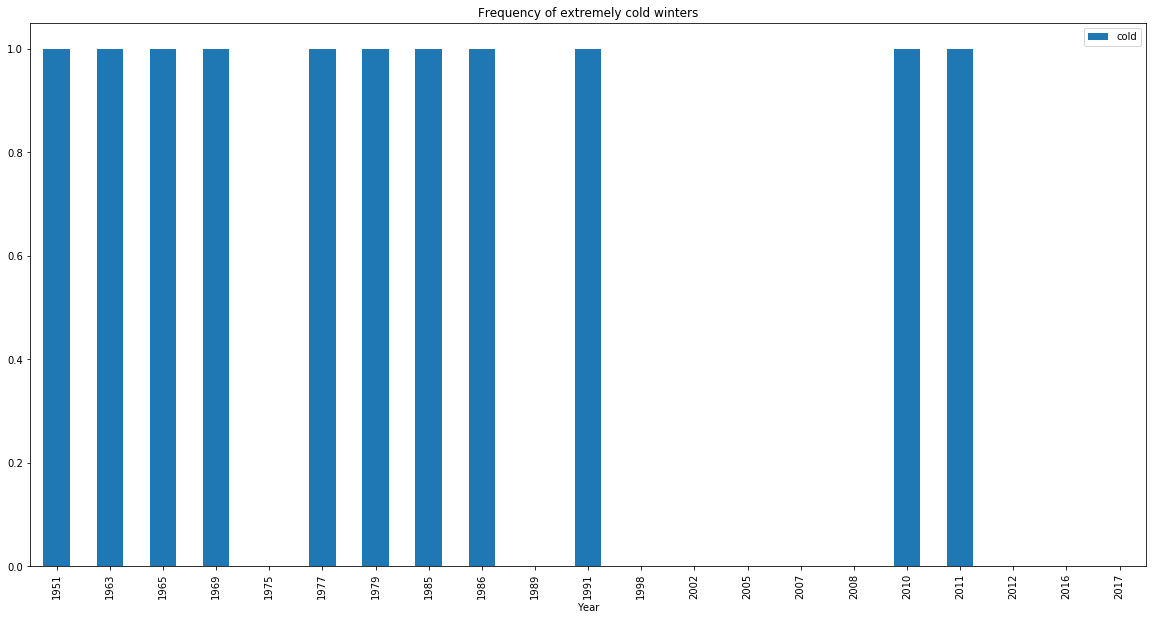

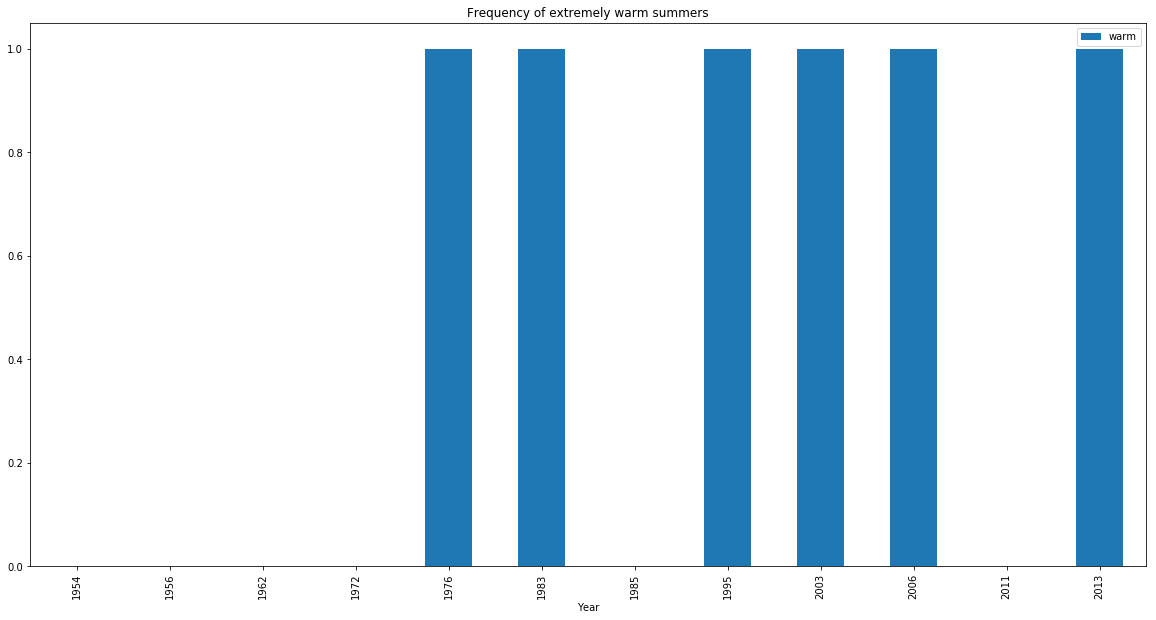

In [29]:
extremewinters = extremeseasons.xs('1', level='Season')
extremesprings = extremeseasons.xs('2', level='Season')
extremesummers = extremeseasons.xs('3', level='Season')
extremeautumns = extremeseasons.xs('4', level='Season')
extremewinters[['cold']].plot(kind='bar', title = 'Frequency of extremely cold winters')
extremesummers[['warm']].plot(kind='bar', title = 'Frequency of extremely warm summers')

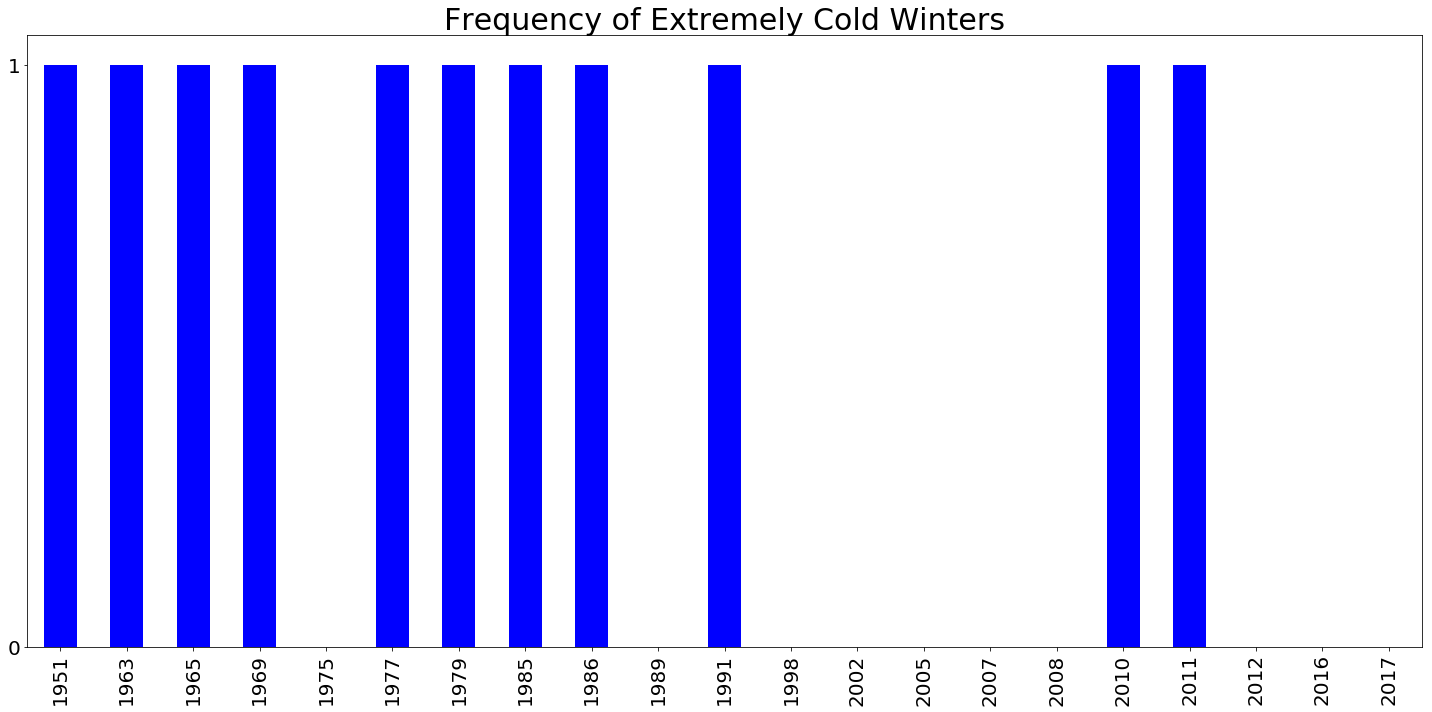

In [30]:
extremewinters[['cold']].plot(kind='bar', title = 'Frequency of Extremely Cold Winters', color = 'blue')
plt.title('Frequency of Extremely Cold Winters', fontsize = 30)
plt.legend().remove()
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.yticks(np.arange(0, 2, step=1.0))
plt.tight_layout()
#save it
os.chdir('E:\Thesis Images')
plt.savefig('ColdWinterFreq.jpeg', format = 'jpeg', dpi = 400)

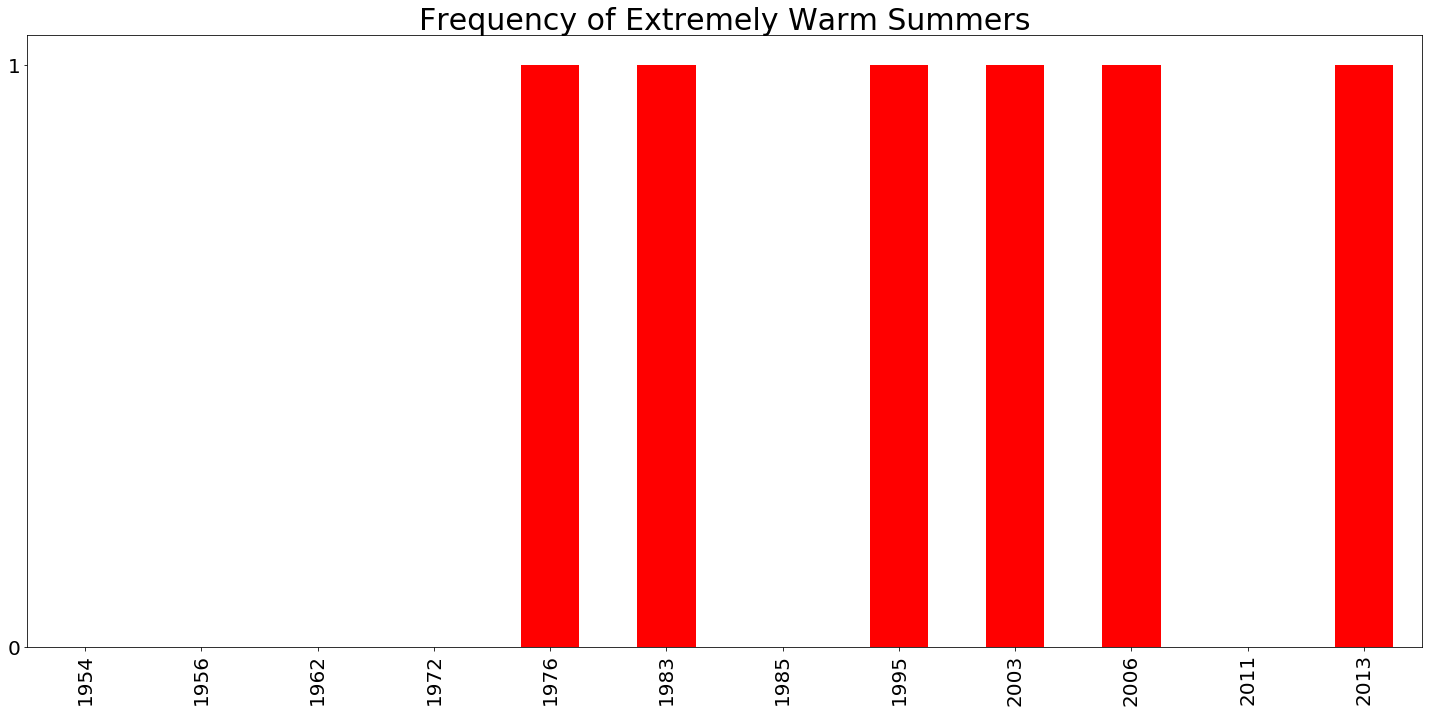

In [31]:
extremesummers[['warm']].plot(kind='bar', title = 'Frequency of Extremely Warm Summers', color = 'red')

plt.title('Frequency of Extremely Warm Summers', fontsize = 30)
plt.legend().remove()
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.yticks(np.arange(0, 2, step=1.0))
plt.tight_layout()
#save it
os.chdir('E:\Thesis Images')
plt.savefig('WarmSummerFreq.jpeg', format = 'jpeg', dpi = 400)

Create new index for extremes

In [32]:
df2.index.tolist()

[(1950L, '1'),
 (1950L, '1'),
 (1950L, '2'),
 (1950L, '2'),
 (1950L, '2'),
 (1950L, '3'),
 (1950L, '3'),
 (1950L, '3'),
 (1950L, '4'),
 (1950L, '4'),
 (1950L, '4'),
 (1951L, '1'),
 (1951L, '1'),
 (1951L, '1'),
 (1951L, '2'),
 (1951L, '2'),
 (1951L, '2'),
 (1951L, '3'),
 (1951L, '3'),
 (1951L, '3'),
 (1951L, '4'),
 (1951L, '4'),
 (1951L, '4'),
 (1952L, '1'),
 (1952L, '1'),
 (1952L, '1'),
 (1952L, '2'),
 (1952L, '2'),
 (1952L, '2'),
 (1952L, '3'),
 (1952L, '3'),
 (1952L, '3'),
 (1952L, '4'),
 (1952L, '4'),
 (1952L, '4'),
 (1953L, '1'),
 (1953L, '1'),
 (1953L, '1'),
 (1953L, '2'),
 (1953L, '2'),
 (1953L, '2'),
 (1953L, '3'),
 (1953L, '3'),
 (1953L, '3'),
 (1953L, '4'),
 (1953L, '4'),
 (1953L, '4'),
 (1954L, '1'),
 (1954L, '1'),
 (1954L, '1'),
 (1954L, '2'),
 (1954L, '2'),
 (1954L, '2'),
 (1954L, '3'),
 (1954L, '3'),
 (1954L, '3'),
 (1954L, '4'),
 (1954L, '4'),
 (1954L, '4'),
 (1955L, '1'),
 (1955L, '1'),
 (1955L, '1'),
 (1955L, '2'),
 (1955L, '2'),
 (1955L, '2'),
 (1955L, '3'),
 (1955L, '

Count extreme values in each year

In [33]:
extremecount = seasdif2.groupby(level=[0]).sum()
extremecount.drop(extremecount.columns[[0]], axis=1, inplace=True)
extremecount

,warm,cold,wet,dry
Year,,,,
1950,0,1,0,0
1951,0,2,0,0
1952,0,1,0,0
1953,0,0,0,0
1954,0,1,0,0
1955,0,0,0,0
1956,0,1,0,0
1957,1,0,0,0
1958,0,0,0,0


## Plot frequency of extremes

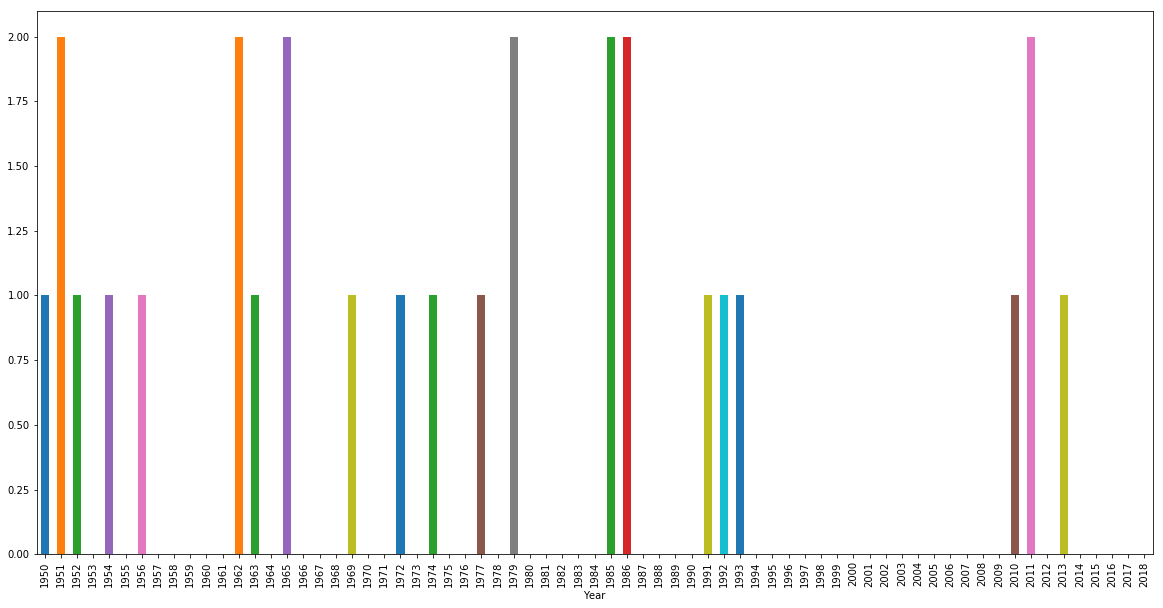

In [34]:
extremecount['cold'].plot(kind='bar')

### View combinations of extremes

In [35]:
seasdif2.loc[(seasdif2.warm==1) & (seasdif2.wet ==1)]

,,tg,warm,cold,wet,dry
Year,Season,,,,,


warm/dry

In [36]:
seasdif2.loc[(seasdif2.warm==1) & (seasdif2.dry ==1)]

,,tg,warm,cold,wet,dry
Year,Season,,,,,


cold/dry

In [37]:
seasdif2.loc[(seasdif2.cold==1) & (seasdif2.dry==1)]

,,tg,warm,cold,wet,dry
Year,Season,,,,,


cold/wet

In [38]:
seasdif2.loc[(seasdif2.cold==1) & (seasdif2.wet ==1)]

,,tg,warm,cold,wet,dry
Year,Season,,,,,


### Create new extreme dataframes to sample from

In [39]:
#cold
extremecold = seasdif2.loc[(seasdif2.cold==1)]

#hot
extremehot = seasdif2.loc[(seasdif2.warm==1)]

#dry
#extremedry = seasdif2.loc[(seasdif2.dry==1)]

#wet
#extremewet = seasdif2.loc[(seasdif2.wet==1)]

#cold-dry
#colddry = seasdif2.loc[(seasdif2.cold==1) & (seasdif2.dry==1)]

#cold-wet
#coldwet = seasdif2.loc[(seasdif2.cold==1) & (seasdif2.wet ==1)]

#hot-dry
#hotdry = seasdif2.loc[(seasdif2.warm==1) & (seasdif2.dry ==1)]

#hot-wet
#hotwet = seasdif2.loc[(seasdif2.warm==1) & (seasdif2.wet ==1)]

#normal
normal = seasdif2.loc[(seasdif2.cold == 0) & (seasdif2.warm==0) & (seasdif2.dry==0) & (seasdif2.wet==0)]

#extreme
extreme = seasdif2.loc[(seasdif2.cold == 1) | (seasdif2.warm==1) | (seasdif2.dry==1) | (seasdif2.wet==1)]

#test 
extreme

tg  warm  cold  wet  dry
Year Season                                
1950 4      -1.220250     0     1    0    0
1951 1      -1.976672     0     1    0    0
     2      -1.571301     0     1    0    0
1952 4      -1.704188     0     1    0    0
1954 3      -1.338991     0     1    0    0
1956 3      -1.086189     0     1    0    0
1957 2       1.061374     1     0    0    0
1962 2      -1.323059     0     1    0    0
     3      -1.146519     0     1    0    0
1963 1      -2.835683     0     1    0    0
1965 1      -1.262734     0     1    0    0
     4      -1.038419     0     1    0    0
1969 1      -1.235500     0     1    0    0
1972 3      -1.331611     0     1    0    0
1974 4      -1.798529     0     1    0    0
1975 1       1.593694     1     0    0    0
1976 3       1.329672     1     0    0    0
1977 1      -1.557405     0     1    0    0
1978 4       1.192661     1     0    0    0
1979 1      -1.904163     0     1    0    0
     2      -1.838608     0     1    0    0
1983 3       1.356503     1     0    0    0
1985 1      -1.089346     0     1    0    0
     3      -1.157215     0     1    0    0
1986 1      -1.248064     0     1    0    0
     2      -1.553590     0     1    0    0
1989 1       1.953859     1     0    0    0
1991 1      -1.097020     0     1    0    0
1992 4      -1.271203     0     1    0    0
1993 4      -1.499738     0     1    0    0
1995 3       1.927583     1     0    0    0
1997 2       1.253498     1     0    0    0
1998 1       1.633914     1     0    0    0
1999 2       1.046300     1     0    0    0
2001 4       1.255939     1     0    0    0
2002 1       1.066405     1     0    0    0
2003 3       1.099195     1     0    0    0
2005 1       1.087870     1     0    0    0
2006 3       1.364177     1     0    0    0
     4       1.369914     1     0    0    0
2007 1       1.209830     1     0    0    0
     2       1.164121     1     0    0    0
     4       1.196032     1     0    0    0
2008 1       1.218200     1     0    0    0
2010 1      -2.347332     0     1    0    0
2011 1      -1.221800     0     1    0    0
     2       1.223773     1     0    0    0
     3      -1.016244     0     1    0    0
     4       1.626434     1     0    0    0
2012 1       1.737797     1     0    0    0
2013 2      -1.424359     0     1    0    0
     3       1.113500     1     0    0    0
2014 2       1.030696     1     0    0    0
2016 1       1.179189     1     0    0    0
2017 1       1.375068     1     0    0    0
     2       1.368022     1     0    0    0

**Get the index to re-index the dataframes**

In [40]:
#cold
coldindex = extremecold.index.tolist()

#hot
hotindex = extremehot.index.tolist()

#dry
#dryindex = extremedry.index.tolist()

#wet
#wetindex = extremewet.index.tolist()

#cold-dry
#colddryindex = colddry.index.tolist()

#cold-wet
#coldwetindex= coldwet.index.tolist()

#hot-dry
#hotdryindex = hotdry.index.tolist()

#hot-wet
#hotwetindex = hotwet.index.tolist()

#normal
normalindex = normal.index.tolist()

#extreme
extremeindex = extreme.index.tolist()

#test
extremeindex

[(1950L, '4'),
 (1951L, '1'),
 (1951L, '2'),
 (1952L, '4'),
 (1954L, '3'),
 (1956L, '3'),
 (1957L, '2'),
 (1962L, '2'),
 (1962L, '3'),
 (1963L, '1'),
 (1965L, '1'),
 (1965L, '4'),
 (1969L, '1'),
 (1972L, '3'),
 (1974L, '4'),
 (1975L, '1'),
 (1976L, '3'),
 (1977L, '1'),
 (1978L, '4'),
 (1979L, '1'),
 (1979L, '2'),
 (1983L, '3'),
 (1985L, '1'),
 (1985L, '3'),
 (1986L, '1'),
 (1986L, '2'),
 (1989L, '1'),
 (1991L, '1'),
 (1992L, '4'),
 (1993L, '4'),
 (1995L, '3'),
 (1997L, '2'),
 (1998L, '1'),
 (1999L, '2'),
 (2001L, '4'),
 (2002L, '1'),
 (2003L, '3'),
 (2005L, '1'),
 (2006L, '3'),
 (2006L, '4'),
 (2007L, '1'),
 (2007L, '2'),
 (2007L, '4'),
 (2008L, '1'),
 (2010L, '1'),
 (2011L, '1'),
 (2011L, '2'),
 (2011L, '3'),
 (2011L, '4'),
 (2012L, '1'),
 (2013L, '2'),
 (2013L, '3'),
 (2014L, '2'),
 (2016L, '1'),
 (2017L, '1'),
 (2017L, '2')]

**WARNING** You may need to comment out some lines of this if there are no full year combinations of data. Check this by examining the output of the code above, if all of the lists are blank for a certain combination of extremes, this code will not work, avoid this by commenting out the combination with a fully blank year. 

In [41]:
#cold
extremecold = df2.loc[coldindex]

#hot
extremehot = df2.loc[hotindex]

#dry
#dry = df2.loc[dryindex]

#wet
#wet = df2.loc[wetindex]

#cold-dry
#colddry = df2.loc[colddryindex]

#cold-wet
#coldwet = df2.loc[coldwetindex] #commented out for Oak Park as there is no coldwet combo

#hot-dry
#hotdry = df2.loc[hotdryindex]

#hot-wet
#hotwet = df2.loc[hotwetindex]

#nomal
normal = df2.loc[normalindex]

#extreme
extreme = df2.loc[extremeindex]

#test view
extreme

latitude  longitude       time     tg   seasdif
Year Season                                                 
1950 4         51.125    -10.875 1950-09-30    NaN -1.220250
     4         51.125    -10.875 1950-10-31    NaN -1.220250
     4         51.125    -10.875 1950-11-30    NaN -1.220250
     4         51.125    -10.625 1950-09-30    NaN -1.220250
     4         51.125    -10.625 1950-10-31    NaN -1.220250
     4         51.125    -10.625 1950-11-30    NaN -1.220250
     4         51.125    -10.375 1950-09-30    NaN -1.220250
     4         51.125    -10.375 1950-10-31    NaN -1.220250
     4         51.125    -10.375 1950-11-30    NaN -1.220250
     4         51.125    -10.125 1950-09-30    NaN -1.220250
     4         51.125    -10.125 1950-10-31    NaN -1.220250
     4         51.125    -10.125 1950-11-30    NaN -1.220250
     4         51.125     -9.875 1950-09-30    NaN -1.220250
     4         51.125     -9.875 1950-10-31    NaN -1.220250
     4         51.125     -9.875 1950-11-30    NaN -1.220250
     4         51.125     -9.625 1950-09-30    NaN -1.220250
     4         51.125     -9.625 1950-10-31    NaN -1.220250
     4         51.125     -9.625 1950-11-30    NaN -1.220250
     4         51.125     -9.375 1950-09-30    NaN -1.220250
     4         51.125     -9.375 1950-10-31    NaN -1.220250
     4         51.125     -9.375 1950-11-30    NaN -1.220250
     4         51.125     -9.125 1950-09-30    NaN -1.220250
     4         51.125     -9.125 1950-10-31    NaN -1.220250
     4         51.125     -9.125 1950-11-30    NaN -1.220250
     4         51.125     -8.875 1950-09-30    NaN -1.220250
     4         51.125     -8.875 1950-10-31    NaN -1.220250
     4         51.125     -8.875 1950-11-30    NaN -1.220250
     4         51.125     -8.625 1950-09-30    NaN -1.220250
     4         51.125     -8.625 1950-10-31    NaN -1.220250
     4         51.125     -8.625 1950-11-30    NaN -1.220250
...               ...        ...        ...    ...       ...
2017 2         55.875     -7.375 2017-03-31    NaN  1.368022
     2         55.875     -7.375 2017-04-30    NaN  1.368022
     2         55.875     -7.375 2017-05-31    NaN  1.368022
     2         55.875     -7.125 2017-03-31    NaN  1.368022
     2         55.875     -7.125 2017-04-30    NaN  1.368022
     2         55.875     -7.125 2017-05-31    NaN  1.368022
     2         55.875     -6.875 2017-03-31    NaN  1.368022
     2         55.875     -6.875 2017-04-30    NaN  1.368022
     2         55.875     -6.875 2017-05-31    NaN  1.368022
     2         55.875     -6.625 2017-03-31    NaN  1.368022
     2         55.875     -6.625 2017-04-30    NaN  1.368022
     2         55.875     -6.625 2017-05-31    NaN  1.368022
     2         55.875     -6.375 2017-03-31    NaN  1.368022
     2         55.875     -6.375 2017-04-30    NaN  1.368022
     2         55.875     -6.375 2017-05-31    NaN  1.368022
     2         55.875     -6.125 2017-03-31   6.98  1.368022
     2         55.875     -6.125 2017-04-30   7.95  1.368022
     2         55.875     -6.125 2017-05-31  11.44  1.368022
     2         55.875     -5.875 2017-03-31    NaN  1.368022
     2         55.875     -5.875 2017-04-30    NaN  1.368022
     2         55.875     -5.875 2017-05-31    NaN  1.368022
     2         55.875     -5.625 2017-03-31   7.01  1.368022
     2         55.875     -5.625 2017-04-30   8.01  1.368022
     2         55.875     -5.625 2017-05-31  11.62  1.368022
     2         55.875     -5.375 2017-03-31   6.97  1.368022
     2         55.875     -5.375 2017-04-30   7.99  1.368022
     2         55.875     -5.375 2017-05-31  11.63  1.368022
     2         55.875     -5.125 2017-03-31    NaN  1.368022
     2         55.875     -5.125 2017-04-30    NaN  1.368022
     2         55.875     -5.125 2017-05-31    NaN  1.368022

[80640 rows x 5 columns]

### Resample the data and create a new sequence

In [42]:
df3 = df2
df3.head()

latitude  longitude       time  tg  seasdif
Year Season                                             
1950 1         51.125    -10.875 1950-01-31 NaN  0.43798
     1         51.125    -10.875 1950-02-28 NaN  0.43798
     2         51.125    -10.875 1950-03-31 NaN  0.35022
     2         51.125    -10.875 1950-04-30 NaN  0.35022
     2         51.125    -10.875 1950-05-31 NaN  0.35022

### Separate years into seasons for each extreme variable

In [113]:
#Cold years
coldsample = [[],[],[],[]] #empty list of lists
for (yr,se) in coldindex: 
    coldsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
coldsample

#hot years
hotsample = [[],[],[],[]] #empty list of lists
for (yr,se) in hotindex: 
    hotsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#dry years
#drysample = [[],[],[],[]] #empty list of lists
#for (yr,se) in dryindex: 
    #drysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#wet years
#wetsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in wetindex: 
    #wetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#cold-dry years
#colddrysample = [[],[],[],[]] #empty list of lists
#for (yr,se) in colddryindex: 
   # colddrysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#hot-dry years
#hotdrysample = [[],[],[],[]] #empty list of lists
#for (yr,se) in hotdryindex: 
    #hotdrysample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#hot-wet years
#hotwetsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in hotwetindex: 
    #hotwetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#cold-wet years
#coldwetsample = [[],[],[],[]] #empty list of lists
#for (yr,se) in coldwetindex: 
    #coldwetsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#normal years
normalsample = [[],[],[],[]] #empty list of lists
for (yr,se) in normalindex: 
    normalsample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]

#extreme years
extremesample = [[],[],[],[]] #empty list of lists
for (yr,se) in extremeindex: 
    extremesample[int(se)-1] += [yr] #function which gives the years which have extreme seasons [[1],[2],[3],[4]]
    
#test
hotsample

[[1975L, 1989L, 1998L, 2002L, 2005L, 2007L, 2008L, 2012L, 2016L, 2017L],
 [1957L, 1997L, 1999L, 2007L, 2011L, 2014L, 2017L],
 [1976L, 1983L, 1995L, 2003L, 2006L, 2013L],
 [1978L, 2001L, 2006L, 2007L, 2011L]]

### Check if extreme indices have enough data to sample from

Checks the data to see if there are enough extreme years and prints an error otherwise - if there are no errors you can assume there is at least one full year of data for each extreme type.

If there is an error - you will not be able to generate that variable (tends to happen for short datasets and combinations of extremes (cold/wet, warm/dry etc). 

To overcome this you can change your threshold for extremes (quantiles) or find longer data. You can also comment out the variables in the code below if there is not enough data.

In [44]:
#cold years 
cold_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
coldseq = [] #blank list
try:
    for yrlist in coldsample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        cold_ctr += 1 # increment cold_ctr variable by 1
        coldseq += [(ran_yr[0], cold_ctr)] #populate coldseq with a random year and a random season (in order)
except:
    print('coldseq (cold extremes) does not have enough extreme data for a full year, it contains: ' + str(coldsample))

################################################################################################################################
#hot years 
hot_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
hotseq = [] #blank list
try:    
    for yrlist in hotsample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        hot_ctr += 1 # increment counter variable by 1
        hotseq += [(ran_yr[0], hot_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('hotseq (hot extremes) does not have enough extreme data for a full year, it contains: ' + str(hotsample))

################################################################################################################################
#dry years
#dry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#dryseq = [] #blank list
#try:
    #for yrlist in drysample: 
       # ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #dry_ctr += 1 # increment counter variable by 1
        #dryseq += [(ran_yr[0], dry_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('dryseq (dry extremes) does not have enough extreme data for a full year, it contains: '  + str(drysample))

################################################################################################################################
#wet years
#wet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#wetseq = [] #blank list
#try:
    #for yrlist in wetsample: 
       #ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #wet_ctr += 1 # increment counter variable by 1
        #wetseq += [(ran_yr[0], wet_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('wetseq (wet extremes) does not have enough extreme data for a full year, it contains: '  + str(wetsample))

################################################################################################################################
#cold-dry years
#colddry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#colddryseq = [] #blank list
#try:
    #for yrlist in colddrysample: 
       # ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #colddry_ctr += 1 # increment counter variable by 1
        #colddryseq += [(ran_yr[0], colddry_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('colddryseq (colddry extremes) does not have enough extreme data for a full year, it contains: '  + str(colddrysample))
################################################################################################################################
#hot-dry years
#hotdry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotdryseq = [] #blank list
#try:
    #for yrlist in hotdrysample: 
       # ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #hotdry_ctr += 1 # increment counter variable by 1
        #hotdryseq += [(ran_yr[0], hotdry_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('hotdryseq (hotdry extremes) does not have enough extreme data for a full year, it contains: '  + str(hotdrysample))

################################################################################################################################
#cold-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list
#try:
    #for yrlist in coldwetsample: 
        #ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #coldwet_ctr += 1 # increment counter variable by 1
        #coldwetseq += [(ran_yr[0], coldwet_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('coldwetseq (coldwet extremes) does not have enough extreme data for a full year, it contains: ' + str(coldwetsample))
################################################################################################################################
#hot-wet years
#hotwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotwetseq = [] #blank list
#try:
    #for yrlist in hotwetsample: 
        #ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        #hotwet_ctr += 1 # increment counter variable by 1
        #hotwetseq += [(ran_yr[0], hotwet_ctr)] #populate blank sequence with a random year and a random season (in order)
#except:
    #print('hotwetseq (hotwet extremes) does not have enough extreme data for a full year, it contains: ' + str(hotwetsample))
    
################################################################################################################################
#Normal years
normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
normalseq = [] #blank list
try:
    for yrlist in normalsample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        normal_ctr += 1 # increment counter variable by 1
        normalseq += [(ran_yr[0], normal_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('normalseq (non-extreme data) does not have enough data for a full year, it contains: ' + str(normalsample))
    
################################################################################################################################
#extreme years
extreme_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
extremeseq = [] #blank list
try:
    for yrlist in extremesample: 
        ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
        extreme_ctr += 1 # increment counter variable by 1
        extremeseq += [(ran_yr[0], extreme_ctr)] #populate blank sequence with a random year and a random season (in order)
except:
    print('extremeseq (extreme data) does not have enough data for a full year, it contains: ' + str(extremesample))

If the output above says there is not enough extreme data for a full year - omit the extreme from your analysis (you will hit errors which will prevent you from using it anyway)

## Annual resampling

In [45]:
#normal years 
normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
normalseq = [] #blank list

#extreme years
extreme_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
extremeseq = [] #blank list

#cold years 
cold_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
coldseq = [] #blank list

#hot years 
hot_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
hotseq = [] #blank list

#dry years
#dry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#dryseq = [] #blank list

#wet years
#wet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#wetseq = [] #blank list

#cold-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list

#cold-dry years
#colddry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#colddryseq = [] #blank list

#warm-dry years
#hotdry_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#hotdryseq = [] #blank list

#warm-wet years
#coldwet_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
#coldwetseq = [] #blank list

Comment/uncomment sections here to alter the way you choose data

## Seasonal Resampling

First - convert the annual dataframes into seasonal dataframes

In [46]:
#normaldata
normalwinter = normalsample[0]
normalspring = normalsample[1]
normalsummer = normalsample[2]
normalautumn = normalsample[3]

#extreme data
extremewinter = extremesample[0]
extremespring = extremesample[1]
extremesummer = extremesample[2]
extremeautumn = extremesample[3]

#cold data
coldwinter = coldsample[0]
coldspring = coldsample[1]
coldsummer = coldsample[2]
coldautumn = coldsample[3]

#hot data
hotwinter = hotsample[0]
hotspring = hotsample[1]
hotsummer = hotsample[2]
hotautumn = hotsample[3]

#wet data
#wetwinter = wetsample[0]
#wetspring = wetsample[1]
#wetsummer = wetsample[2]
#wetautumn = wetsample[3]

#dry data
#drywinter = drysample[0]
#dryspring = drysample[1]
#drysummer = drysample[2]
#dryautumn = drysample[3]

#cold-dry data
#colddrywinter = colddrysample[0]
#colddryspring = colddrysample[1]
#colddrysummer = colddrysample[2]
#colddryautumn = colddrysample[3]

#hot-dry data
#hotdrywinter = hotdrysample[0]
#hotdryspring = hotdrysample[1]
#hotdrysummer = hotdrysample[2]
#hotdryautumn = hotdrysample[3]

#cold-wet data
#coldwetwinter = coldwetsample[0]
#coldwetspring = coldwetsample[1]
#coldwetsummer = coldwetsample[2]
#coldwetautumn = coldwetsample[3]

#hot-wet data
#hotwetwinter = hotwetsample[0]
#hotwetspring = hotwetsample[1]
#hotwetsummer = hotwetsample[2]
#hotwetautumn = hotwetsample[3]

### Define annual functions (for generating normal and extreme years)

In [47]:
def normalyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    normal_ctr = 0 #variable to count from (1 is winter, 2 spring, 3 summer, 4 autumn)
    normalseq = [] #blank list
    for i in range (years): #change number here for number of years
        for yrlist in normalsample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            normal_ctr += 1 # increment cold_ctr variable by 1
            normalseq += [(ran_yr[0], normal_ctr)]
        for item in normalseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(normal.query("Year == %d and Season == '%d'" % item))
            normalseq = [] #reset coldseq to an empty list so it samples from a new random year
            normal_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4  

In [48]:
def extremeyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    extremeseq = [] #reset to an empty list so it samples from a new random year
    extreme_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4
    for i in range (years): #change number here for number of years
        for yrlist in extremesample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            extreme_ctr += 1 # increment counter variable by 1
            extremeseq += [(ran_yr[0], extreme_ctr)]
        for item in extremeseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(extreme.query("Year == %d and Season == '%d'" % item))
            extremeseq = [] #reset to an empty list so it samples from a new random year
            extreme_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4

In [49]:
def hotyear(projection, years):
    '''Function takes 2 arguments: 'projection' is the dataframe you will generate and populate with your data, 'years' is the
    number of output years'''
    hotseq = [] #reset to an empty list so it samples from a new random year
    hot_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4
    for i in range (years): #change number here for number of years
        for yrlist in hotsample:
            ran_yr = np.random.choice(yrlist, 1) #choose a randomly sampled year from previous cell
            hot_ctr += 1 # increment counter variable by 1
            hotseq += [(ran_yr[0], hot_ctr)]
        for item in hotseq: #item is a tuple with year and season, coldseq is all extreme cold year and season pairs 
            projection.append(extremehot.query("Year == %d and Season == '%d'" % item))
            hotseq = [] #reset to an empty list so it samples from a new random year
            hot_ctr = 0 #reset counter to 0 so seasons stay as 1,2,3,4

### Define seasonal functions

In [50]:
def futurewinter(projection, data, input_list):
    '''function takes 3 arguments, projection is the dataframe you will write your data to, data is the dataset you are sampling
    from (e.g. extreme contains all extreme data), and input_list is the list of years for your variable 
    (e.g. extremewinter contains all years with extreme winters).'''
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 1)] #takes the random year and appends number 1 (to denote winter)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [51]:
def futurespring(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 2)] #takes the random year and appends number 2 (to denote spring)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [52]:
def futuresummer(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 3)] #takes the random year and appends number 3 (to denote summer)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

In [53]:
def futureautumn(projection, data, input_list):
    items = [] #blank list to populate with year/season pairs
    ran_yr = np.random.choice(input_list, 1) #chooses a random year
    items += [(ran_yr[0], 4)] #takes the random year and appends number 4 (to denote autumn)
    for item in items:
        projection.append(data.query("Year == %d and Season == '%d'" % item)) 

## All possible year and season combinations

To generate your final sequence you can choose combinations of years and seasons, i.e. you can have 5 'normal' years followed by a cold winter, a wet spring, a dry summer and a wet autumn. Do this by copying and pasting the relevant code

**WARNING: IF SECTIONS OF CODE DON'T RUN IT IS DUE TO LACK OF DATA COMBINATIONS**

In [54]:
projection = [] #sample blank dataframe so code runs

In [55]:
#normal year
normalyear(projection, 1) #one normal year for example

In [56]:
#extreme year
extremeyear(projection, 1) #one extreme year

In [57]:
#hot year
hotyear(projection, 1) #one extreme year

**Winter Functions**

In [58]:
#normal winter
futurewinter(projection, normal, normalwinter)

In [59]:
#extreme winter
futurewinter(projection, extreme, extremewinter)

In [60]:
#wet winter
#futurewinter(projection, extremewet, wetwinter)

In [61]:
#dry winter
#futurewinter(projection, extremedry, drywinter)

In [62]:
#hot winter
futurewinter(projection, extremehot, hotwinter)

In [63]:
#cold winter
futurewinter(projection, extremecold, coldwinter)

In [64]:
#hot-wet winter
#futurewinter(projection, hotwet, hotwetwinter)

In [65]:
#hot-dry winter
#futurewinter(projection, hotdry, hotdrywinter)

In [66]:
#cold-wet winter
#futurewinter(projection, coldwet, coldwetwinter)

In [67]:
#cold-dry winter
#futurewinter(projection, colddry, colddrywinter)

**Spring Functions**

In [68]:
#normal spring
futurespring(projection, normal, normalspring)

In [69]:
#extreme spring
futurespring(projection, extreme, extremespring)

In [70]:
#wet spring
#futurespring(projection, extremewet, wetspring)

In [71]:
#dry spring
#futurespring(projection, extremedry, dryspring)

In [72]:
#hot spring
futurespring(projection, extremehot, hotspring)

In [73]:
#cold spring
futurespring(projection, extremecold, coldspring)

In [74]:
#hot-wet spring
#futurespring(projection, hotwet, hotwetspring)

In [75]:
#hot-dry spring
#futurespring(projection, hotdry, hotdryspring)

In [76]:
#cold-wet spring
#futurespring(projection, hotdry, hotdryspring)

In [77]:
#cold-dry spring
#futurespring(projection,colddry, colddryspring)

**Summer Functions**

In [78]:
#normal summer
futuresummer(projection, normal, normalsummer)

In [79]:
#extreme summer
futuresummer(projection, extreme, extremesummer)

In [80]:
#wet summer
#futuresummer(projection, extremewet, wetsummer)

In [81]:
#dry summer
#futuresummer(projection, extremedry, drysummer)

In [82]:
#hot summer
futuresummer(projection, extremehot, hotsummer)

In [83]:
#cold summer
futuresummer(projection, extremecold, coldsummer)

In [84]:
#hot-wet summer
#futuresummer(projection, hotwet, hotwetsummer)

In [85]:
#hot-dry summer
#futuresummer(projection, hotdry, hotdrysummer)

In [86]:
#cold-wet summer
#futuresummer(projection, coldwet, coldwetsummer)

In [87]:
#cold-dry summer
#futuresummer(projection, colddry, colddrysummer)

**Autumn Functions**

In [88]:
#normal autumn
futureautumn(projection, normal, normalautumn)

In [89]:
#extreme autumn
futureautumn(projection, extreme, extremeautumn)

In [90]:
#wet autumn
#futureautumn(projection, extremewet, wetautumn)

In [91]:
#dry autumn
#futureautumn(projection, extremedry, dryautumn)

In [92]:
#hot autumn
futureautumn(projection, extremehot, hotautumn)

In [93]:
#cold autumn
futureautumn(projection, extremecold, coldautumn)

In [94]:
#hot-wet autumn
#futureautumn(projection, hotwet, hotwetautumn)

In [95]:
#hot-dry autumn
#futureautumn(projection, hotdry, hotdryautumn)

In [96]:
#cold-wet autumn
#futureautumn(projection, coldwet, coldwetautumn)

In [97]:
#cold-dry autumn
#futureautumn(projection, colddry, colddryautumn)

## Generate your new sequence

Simply copy and paste the functions above (following seasonal sequence) to generate your future climate. The example below shows 2 'normal years', followed by 2 'extreme' years, a cold winter, wet spring, hot/dry summer, and hot/wet autumn. 

### First, The spin-up dataframe

In [98]:
spinupdf = df2
spinupdf.head()

latitude  longitude       time  tg  seasdif
Year Season                                             
1950 1         51.125    -10.875 1950-01-31 NaN  0.43798
     1         51.125    -10.875 1950-02-28 NaN  0.43798
     2         51.125    -10.875 1950-03-31 NaN  0.35022
     2         51.125    -10.875 1950-04-30 NaN  0.35022
     2         51.125    -10.875 1950-05-31 NaN  0.35022

In [99]:
spinupdf = spinupdf.reset_index()

In [100]:
spinupdf = spinupdf.set_index(['time'])
spinupdf.head()

,Year,Season,latitude,longitude,tg,seasdif
time,,,,,,
1950-01-31,1950,1,51.125,-10.875,NaN,0.43798
1950-02-28,1950,1,51.125,-10.875,NaN,0.43798
1950-03-31,1950,2,51.125,-10.875,NaN,0.35022
1950-04-30,1950,2,51.125,-10.875,NaN,0.35022
1950-05-31,1950,2,51.125,-10.875,NaN,0.35022


In [101]:
spinup = spinupdf.loc['1970-01-31':'2000-11-30'] #extract your years here
spinup.tail(n=100)
#print(len(spinup))

,Year,Season,latitude,longitude,tg,seasdif
time,,,,,,
1992-08-31,1992,3,55.875,-5.125,NaN,0.071228
1992-09-30,1992,4,55.875,-5.125,NaN,-1.271203
1992-10-31,1992,4,55.875,-5.125,NaN,-1.271203
1992-11-30,1992,4,55.875,-5.125,NaN,-1.271203
1992-12-31,1993,1,55.875,-5.125,NaN,0.722998
1993-01-31,1993,1,55.875,-5.125,NaN,0.722998
1993-02-28,1993,1,55.875,-5.125,NaN,0.722998
1993-03-31,1993,2,55.875,-5.125,NaN,0.238352
1993-04-30,1993,2,55.875,-5.125,NaN,0.238352


In [102]:
spinup = spinup.reset_index() #reindex the df so TECHNICALLY you should be able to append your data after this data?
spinup.head()

,time,Year,Season,latitude,longitude,tg,seasdif
0,1970-01-31,1970,1,51.125,-10.875,NaN,-0.791929
1,1970-02-28,1970,1,51.125,-10.875,NaN,-0.791929
2,1970-03-31,1970,2,51.125,-10.875,NaN,-0.559322
3,1970-04-30,1970,2,51.125,-10.875,NaN,-0.559322
4,1970-05-31,1970,2,51.125,-10.875,NaN,-0.559322


In [103]:
spinup.tail()

,time,Year,Season,latitude,longitude,tg,seasdif
178075,2000-07-31,2000,3,55.875,-5.125,NaN,0.458097
178076,2000-08-31,2000,3,55.875,-5.125,NaN,0.458097
178077,2000-09-30,2000,4,55.875,-5.125,NaN,-0.211825
178078,2000-10-31,2000,4,55.875,-5.125,NaN,-0.211825
178079,2000-11-30,2000,4,55.875,-5.125,NaN,-0.211825


In [104]:
spinup.set_index(['latitude', 'longitude', 'time'], inplace=True)

In [105]:
#back to xarray dataset
spinup = spinup.to_xarray()
spinup

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 371)
Coordinates:
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
  * time       (time) datetime64[ns] 1970-01-31 1970-02-28 1970-03-31 ...
Data variables:
    Year       (latitude, longitude, time) int64 1970 1970 1970 1970 1970 ...
    Season     (latitude, longitude, time) object '1' '1' '2' '2' '2' '3' ...
    tg         (latitude, longitude, time) float32 nan nan nan nan nan nan ...
    seasdif    (latitude, longitude, time) float32 -0.79192877 -0.79192877 ...

In [106]:
#comment this back in when you need it
#spinup.to_netcdf('E:/Data/EObs/1970-2000.nc', engine='scipy') #save it as a NetCDF file

In [107]:
#convert to netcdf
#futuretest.to_netcdf('E:/Data/EObs/futuretemptestrun.nc', engine='scipy') #write to NetCDF (needs to be indexed by unique variable, e.g. time)

## Now generate your future run

this blank dataframe will create annual or seasonal sequences - make sure you respect the seasonal sequence if doing individual seasons! 

Choose what you want your future scenario to be and ONLY choose the ones you actually want, for example if you want 10 hot years then just run the hotyear command with a 10 in it

In [108]:
future = [] #blank dataframe (should be the first argument in all following functions)

In [109]:
#hot year
hotyear(future, 10)

In [102]:
#normal year
normalyear(future, 10) #change number here for number of years

In [239]:
#extreme year
extremeyear(future, 10) #change number here for number of years

In [246]:
#cold winter
futurewinter(future, extremecold, coldwinter)

In [247]:
#cold spring
futurespring(future, extremecold, coldspring)

In [248]:
#hot summer
futuresummer(future, extremehot, hotsummer)

In [249]:
#hot autumn
futureautumn(future, extremehot, hotautumn)

In [120]:
#wet spring
#futurespring(future, extremewet, wetspring)

In [121]:
#hot-dry summer
#futuresummer(future, hotdry, hotdrysummer)

In [122]:
#hot-wet autumn
#futureautumn(future, hotwet, hotwetautumn)

In [110]:
future = pd.concat(future) #concatenate the dataframe and print for inspection
future.head()

latitude  longitude       time  tg   seasdif
Year Season                                              
1998 1         51.125    -10.875 1997-12-31 NaN  1.633914
     1         51.125    -10.875 1998-01-31 NaN  1.633914
     1         51.125    -10.875 1998-02-28 NaN  1.633914
     1         51.125    -10.625 1997-12-31 NaN  1.633914
     1         51.125    -10.625 1998-01-31 NaN  1.633914

In [111]:
future = future.rename(columns={"time":"date"})

In [112]:
#write the future data to excel if you want to use Mike's EurasiaUtilsGUI 
futureXLS = future.to_excel('E:/Data/EObs/10VeryHotYears_Tg.xlsx') # write to Excel

At this point use this excel file and the EurasiaUtilsGUI to generate future climate files

In [115]:
future = future.rename(columns={"time":"olddate"})

## Creating Future Data

This section allows for the generation of a new NetCDF file from the spinup and future periods, by creating a dummy date variable from 2000-2010 for the future data, and joining this to the real data from 1970-1999

In [151]:
future = future.reset_index()
future.head()

,Year,Season,latitude,longitude,olddate,tg,seasdif
0,1995,1,51.125,-10.875,1994-12-31,NaN,0.855453
1,1995,1,51.125,-10.875,1995-01-31,NaN,0.855453
2,1995,1,51.125,-10.875,1995-02-28,NaN,0.855453
3,1995,1,51.125,-10.625,1994-12-31,NaN,0.855453
4,1995,1,51.125,-10.625,1995-01-31,NaN,0.855453


#### add new date variable from file

In [152]:
'''this excel file contains dates on a seasonal basis for each lat/lon combo 
from 2000-2010 to allow for merging with the 1970-1999 EObs past data'''

df = pd.read_excel('E:/Vault/Dates2000-2010.xlsx')

In [153]:
df.head()

,date
0,1999-12-31
1,2000-01-31
2,2000-02-28
3,1999-12-31
4,2000-01-31


In [183]:
#add this to the future data as the 'time' column
future['time'] = df['date']

In [185]:
future.head()

,Year,Season,latitude,longitude,olddate,tg,seasdif,date,time
0,1995,1,51.125,-10.875,1994-12-31,NaN,0.855453,1999-12-31,1999-12-31
1,1995,1,51.125,-10.875,1995-01-31,NaN,0.855453,2000-01-31,2000-01-31
2,1995,1,51.125,-10.875,1995-02-28,NaN,0.855453,2000-02-28,2000-02-28
3,1995,1,51.125,-10.625,1994-12-31,NaN,0.855453,1999-12-31,1999-12-31
4,1995,1,51.125,-10.625,1995-01-31,NaN,0.855453,2000-01-31,2000-01-31


#### Join spinup and new df

In [186]:
#the spinup df goes to Nov 1999, the future df picks up in December 1999

spinup = spinupdf.loc['1970-01-31':'1999-11-30'] #extract your years here
spinup.tail(n=100)

,Year,Season,latitude,longitude,tg,seasdif
time,,,,,,
1991-08-31,1991,3,55.875,-5.125,NaN,0.226814
1991-09-30,1991,4,55.875,-5.125,NaN,-0.005653
1991-10-31,1991,4,55.875,-5.125,NaN,-0.005653
1991-11-30,1991,4,55.875,-5.125,NaN,-0.005653
1991-12-31,1992,1,55.875,-5.125,NaN,0.923749
1992-01-31,1992,1,55.875,-5.125,NaN,0.923749
1992-02-29,1992,1,55.875,-5.125,NaN,0.923749
1992-03-31,1992,2,55.875,-5.125,NaN,0.808242
1992-04-30,1992,2,55.875,-5.125,NaN,0.808242


In [209]:
#reset the index 
spinup = spinup.reset_index()

spinup

,latitude,longitude,time,Year,Season,tg,seasdif
0,51.125,-10.875,1970-01-31,1970,1,NaN,-0.791929
1,51.125,-10.875,1970-02-28,1970,1,NaN,-0.791929
2,51.125,-10.875,1970-03-31,1970,2,NaN,-0.559322
3,51.125,-10.875,1970-04-30,1970,2,NaN,-0.559322
4,51.125,-10.875,1970-05-31,1970,2,NaN,-0.559322
5,51.125,-10.875,1970-06-30,1970,3,NaN,0.312730
6,51.125,-10.875,1970-07-31,1970,3,NaN,0.312730
7,51.125,-10.875,1970-08-31,1970,3,NaN,0.312730
8,51.125,-10.875,1970-09-30,1970,4,NaN,0.208321
9,51.125,-10.875,1970-10-31,1970,4,NaN,0.208321


In [210]:
#set the index so the xarray dataset has coordinates
spinup = spinup.set_index(['latitude', 'longitude', 'time'])
spinup.head()

Year Season  tg   seasdif
latitude longitude time                                 
51.125   -10.875   1970-01-31  1970      1 NaN -0.791929
                   1970-02-28  1970      1 NaN -0.791929
                   1970-03-31  1970      2 NaN -0.559322
                   1970-04-30  1970      2 NaN -0.559322
                   1970-05-31  1970      2 NaN -0.559322

In [214]:
future = future.reset_index()

In [215]:
#set the index so the xarray dataset has coordinates
future = future.set_index(['latitude', 'longitude', 'time'])
future.head()

Year Season    olddate  tg   seasdif       date
latitude longitude time                                                       
51.125   -10.875   1999-12-31  1995      1 1994-12-31 NaN  0.855453 1999-12-31
                   2000-01-31  1995      1 1995-01-31 NaN  0.855453 2000-01-31
                   2000-02-28  1995      1 1995-02-28 NaN  0.855453 2000-02-28
         -10.625   1999-12-31  1995      1 1994-12-31 NaN  0.855453 1999-12-31
                   2000-01-31  1995      1 1995-01-31 NaN  0.855453 2000-01-31

In [216]:
#convert to xarray dataset
spinupds = spinup.to_xarray()

In [217]:
#convert to xarray dataset
futureds = future.to_xarray()

In [218]:
#merge the datasets using xarray merge command
merged = spinupds.merge(futureds)

In [222]:
#have a look at the new dataset
merged

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 24, time: 479)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-31 1970-02-28 1970-03-31 ...
  * latitude   (latitude) float64 51.12 51.38 51.62 51.88 52.12 52.38 52.62 ...
  * longitude  (longitude) float64 -10.88 -10.62 -10.38 -10.12 -9.875 -9.625 ...
Data variables:
    Year       (latitude, longitude, time) float64 1.97e+03 1.97e+03 ...
    Season     (latitude, longitude, time) object '1' '1' '2' '2' '2' '3' ...
    tg         (latitude, longitude, time) float32 nan nan nan nan nan nan ...
    seasdif    (latitude, longitude, time) float32 -0.79192877 -0.79192877 ...
    olddate    (latitude, longitude, time) datetime64[ns] NaT NaT NaT NaT ...
    date       (latitude, longitude, time) datetime64[ns] NaT NaT NaT NaT ...

In [221]:
#write the data to a netcdf file for running the model with
merged.to_netcdf('E:/Data/EObs/10HotYears.nc')

### The following is code which MAY be incorporated if you want to use it:

In [136]:
#drop columns that aren't necessary
testrun = testrun.drop(['Season', 'Year', 'seasdif'], axis = 1)
testrun.head()

,level_0,Order,latitude,longitude,tg,time
0,0,NaN,51.125,-10.875,NaN,1970-01-31
1,1,NaN,51.125,-10.875,NaN,1970-02-28
2,2,NaN,51.125,-10.875,NaN,1970-03-31
3,3,NaN,51.125,-10.875,NaN,1970-04-30
4,4,NaN,51.125,-10.875,NaN,1970-05-31
